In [1]:
from zentools.data_operations import slice_dataframe_by_date, add_macd, add_ewm_rsi, add_rsi
import pandas as pd
import numpy as np

In [2]:
# Load the CSV without the deprecated 'date_parser'
data = pd.read_csv("/home/bobo/Documents/Datasets/Binance_ETHUSDT_1h .csv", parse_dates=["Date"], index_col="Date")

# Convert the index to datetime manually (to ensure proper handling of any date format)
data.index = pd.to_datetime(data.index, format='ISO8601')

# Sort the DataFrame by index
data = data.sort_index()

In [4]:
add_macd(data, 12, 26, 9)
add_rsi(data)

Symbol     Open     High      Low    Close  Volume ETH  \
Date                                                                           
2017-08-17 04:00:00  ETHUSDT   301.13   302.57   298.00   301.61   125.66877   
2017-08-17 05:00:00  ETHUSDT   301.61   303.28   300.00   303.10   377.67246   
2017-08-17 06:00:00  ETHUSDT   302.40   304.44   301.90   302.68   303.86672   
2017-08-17 07:00:00  ETHUSDT   302.68   307.96   302.60   307.96   754.74510   
2017-08-17 08:00:00  ETHUSDT   307.95   309.97   307.00   308.62   150.75029   
...                      ...      ...      ...      ...      ...         ...   
2023-10-19 19:00:00  ETHUSDT  1561.66  1569.92  1561.20  1568.00  6092.96190   
2023-10-19 20:00:00  ETHUSDT  1568.00  1573.15  1563.72  1566.51  8725.29650   
2023-10-19 21:00:00  ETHUSDT  1566.51  1567.72  1563.39  1563.46  5240.29830   
2023-10-19 22:00:00  ETHUSDT  1563.45  1568.00  1563.39  1564.22  4833.05790   
2023-10-19 23:00:00  ETHUSDT  1564.22  1567.31  1563.70  1566.57  3403.82350   

                      Volume USDT  tradecount       EMA_12       EMA_26  \
Date                                                                      
2017-08-17 04:00:00  3.768480e+04         129   301.610000   301.610000   
2017-08-17 05:00:00  1.140433e+05         202   301.839231   301.720370   
2017-08-17 06:00:00  9.203444e+04         182   301.968580   301.791454   
2017-08-17 07:00:00  2.297251e+05         198   302.890337   302.248383   
2017-08-17 08:00:00  4.655946e+04         182   303.771823   302.720355   
...                           ...         ...          ...          ...   
2023-10-19 19:00:00  9.540306e+06       16003  1559.860619  1559.931081   
2023-10-19 20:00:00  1.369178e+07       19124  1560.883601  1560.418408   
2023-10-19 21:00:00  8.200644e+06       15157  1561.279970  1560.643711   
2023-10-19 22:00:00  7.566292e+06       12073  1561.732282  1560.908622   
2023-10-19 23:00:00  5.327189e+06       12103  1562.476546  1561.327983   

                         MACD  Signal_Line  Histogram        RSI  
Date                                                              
2017-08-17 04:00:00  0.000000     0.000000   0.000000        NaN  
2017-08-17 05:00:00  0.118860     0.023772   0.095088        NaN  
2017-08-17 06:00:00  0.177126     0.054443   0.122683        NaN  
2017-08-17 07:00:00  0.641953     0.171945   0.470008        NaN  
2017-08-17 08:00:00  1.051468     0.347850   0.703619        NaN  
...                       ...          ...        ...        ...  
2023-10-19 19:00:00 -0.070462    -2.304089   2.233627  74.061433  
2023-10-19 20:00:00  0.465192    -1.750233   2.215425  73.333333  
2023-10-19 21:00:00  0.636258    -1.272935   1.909193  66.495287  
2023-10-19 22:00:00  0.823660    -0.853616   1.677276  75.407779  
2023-10-19 23:00:00  1.148563    -0.453180   1.601743  77.526439  

[53988 rows x 14 columns]

In [23]:
slice = slice_dataframe_by_date(data, '2021-04-10 07:00:00', '2021-04-14 07:00:00')

In [24]:
import matplotlib.pyplot as plt

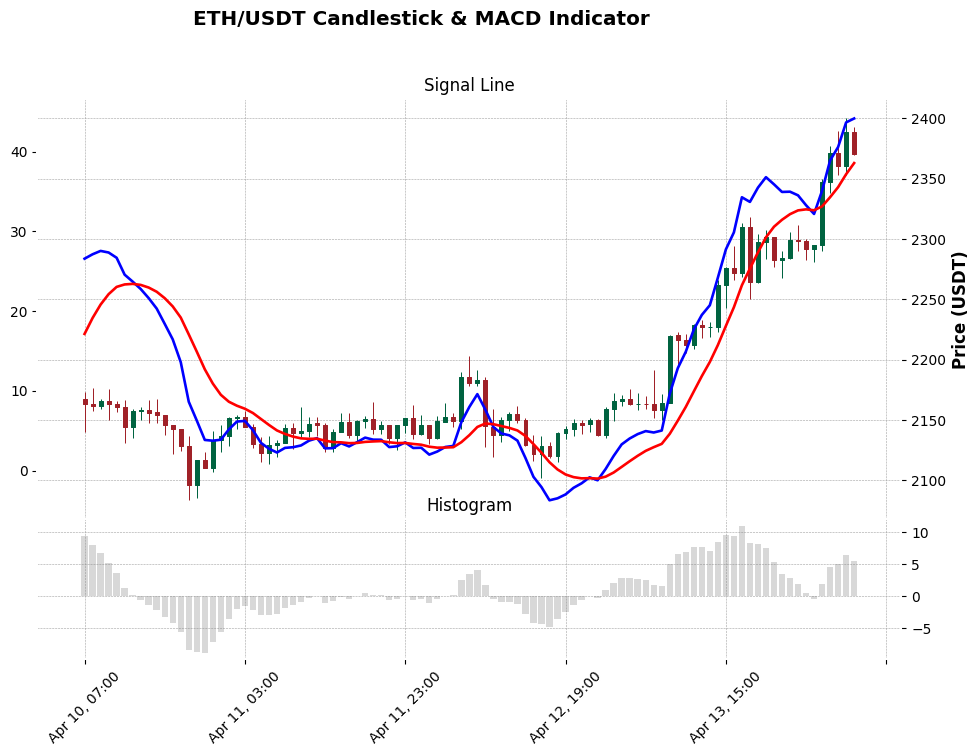

In [25]:
import mplfinance as mpf

# Assuming `slice` is the DataFrame containing your data
# Create an mpf-style chart with candlesticks and MACD on the same graph

# Define the MACD and Signal Line as additional plots
macd_plot = mpf.make_addplot(slice['MACD'], panel=0, color='blue', title='MACD')
signal_plot = mpf.make_addplot(slice['Signal_Line'], panel=0, color='red', title='Signal Line')

# Define the histogram as a bar plot in a separate panel below the candlestick chart
histogram_plot = mpf.make_addplot(slice['Histogram'], panel=1, type='bar', color='gray', alpha=0.3, title='Histogram')

# Create the candlestick chart with the MACD and Signal Lines overlaid
mpf.plot(slice, type='candle', style='charles', figsize=(12, 8),
         title='ETH/USDT Candlestick & MACD Indicator',
         ylabel='Price (USDT)', ylabel_lower='Volume',
         addplot=[macd_plot, signal_plot, histogram_plot],
         panel_ratios=(3,1))  # Control the size ratio of the panels


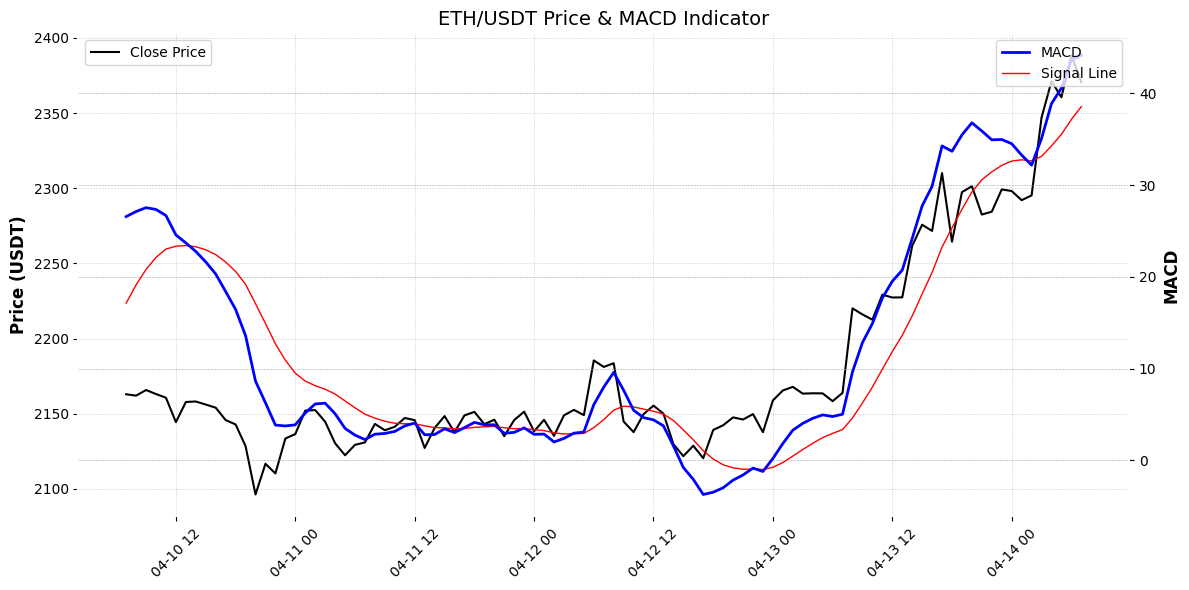

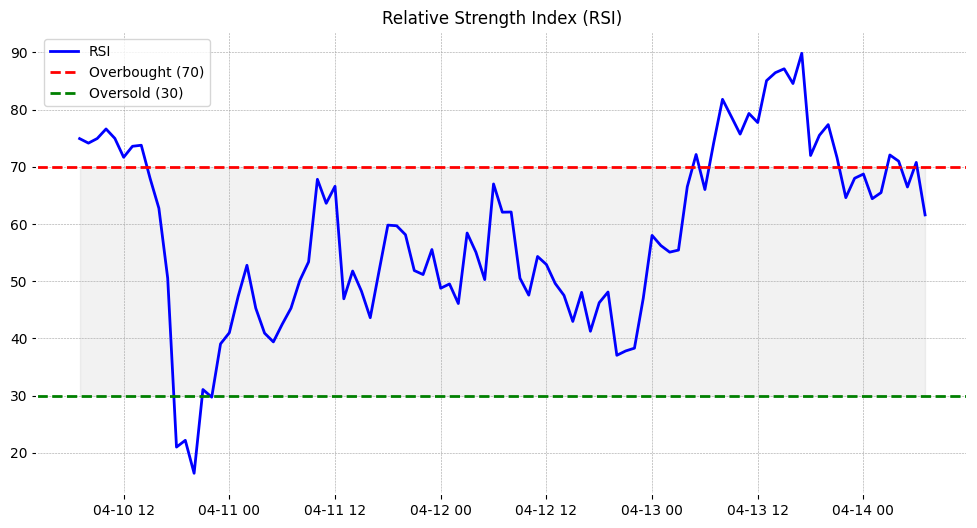

In [26]:
import matplotlib.pyplot as plt

# Assuming 'slice' is the DataFrame with your data
# You might want to slice the data for a specific range, e.g., last 30 days
# slice = data[-30:]  # Example for last 30 rows

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the price (e.g., closing price) on the first subplot (ax1)
ax1.plot(slice.index, slice['Close'], label='Close Price', color='black', lw=1.5, zorder=5)

# Add title and labels for the first axis (price)
ax1.set_title('ETH/USDT Price & MACD Indicator', fontsize=14)
ax1.set_ylabel('Price (USDT)', fontsize=12)

# Make the x-axis labels more readable
ax1.tick_params(axis='x', rotation=45)

# Create a second y-axis to plot the MACD and Signal Line
ax2 = ax1.twinx()

# Plot the MACD and Signal Line on the same axis (ax2)
ax2.plot(slice.index, slice['MACD'], label='MACD', color='blue', lw=2, zorder=4)
ax2.plot(slice.index, slice['Signal_Line'], label='Signal Line', color='red', lw=1, zorder=3)

# Add labels and title for the second axis (MACD)
ax2.set_ylabel('MACD', fontsize=12)

# Create legends
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

# Grid for better visibility
ax1.grid(True, linestyle='--', alpha=0.5)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
import matplotlib.pyplot as plt

# Plot the RSI with a threshold of 30 (oversold) and 70 (overbought)
plt.figure(figsize=(12, 6))
plt.plot(slice.index, slice['RSI'], label='RSI', color='b')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.fill_between(slice.index, 30, 70, color='gray', alpha=0.1)
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

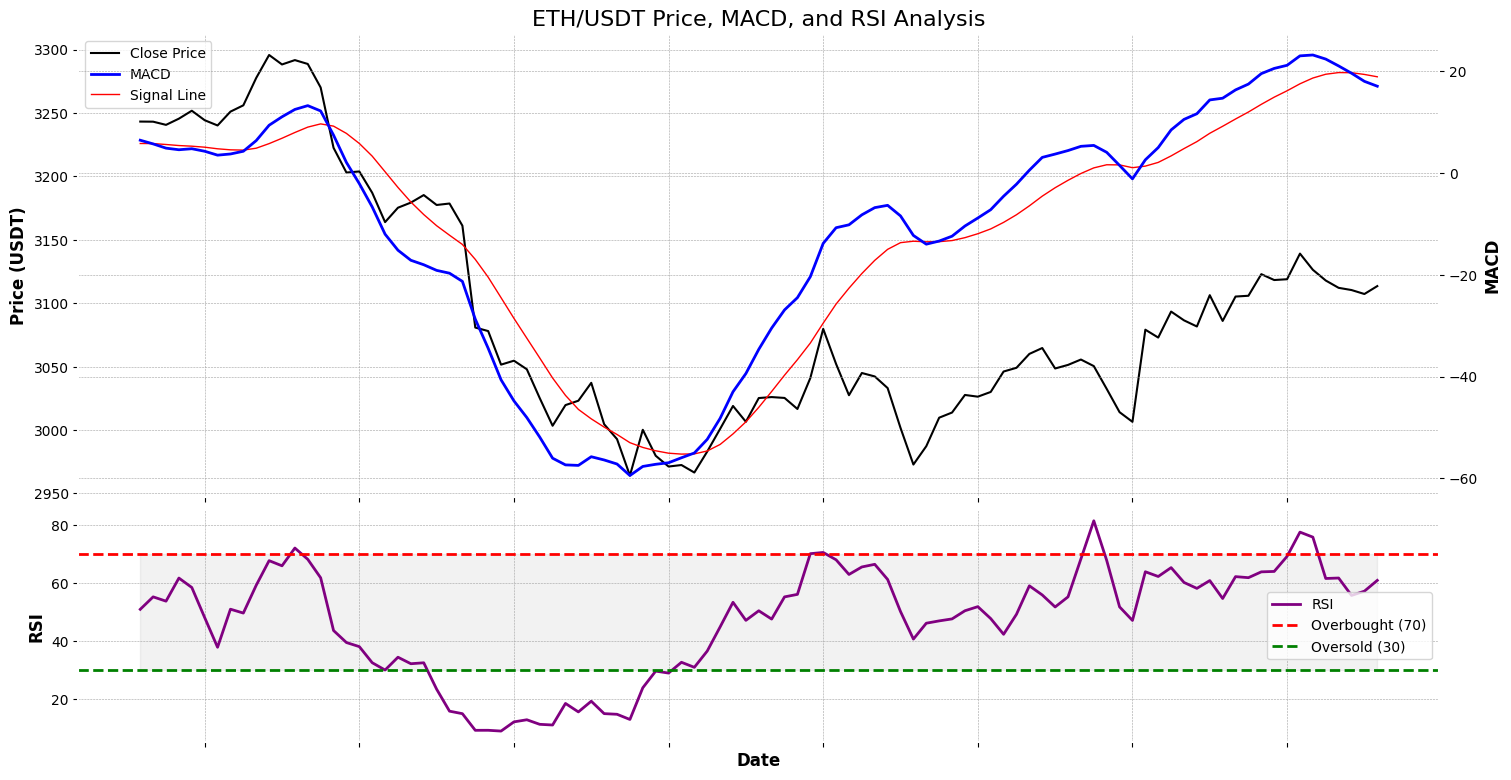

In [21]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def plot_technical_analysis(slice):
    """
    Create a comprehensive technical analysis plot with price, MACD, and RSI.

    Args:
        slice (pd.DataFrame): DataFrame containing 'Close', 'MACD', 'Signal_Line', and 'RSI' columns
    """
    # Create a figure with custom grid layout
    fig = plt.figure(figsize=(15, 10), constrained_layout=True)
    gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1], figure=fig)

    # Price and MACD Subplot
    ax1 = fig.add_subplot(gs[0])
    # Price plot
    ax1.plot(slice.index, slice['Close'], label='Close Price', color='black', lw=1.5, zorder=5)
    ax1.set_title('ETH/USDT Price, MACD, and RSI Analysis', fontsize=16)
    ax1.set_ylabel('Price (USDT)', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    
    # MACD plot on the same axis
    ax1_twin = ax1.twinx()
    ax1_twin.plot(slice.index, slice['MACD'], label='MACD', color='blue', lw=2, zorder=4)
    ax1_twin.plot(slice.index, slice['Signal_Line'], label='Signal Line', color='red', lw=1, zorder=3)
    ax1_twin.set_ylabel('MACD', fontsize=12)
    
    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_twin.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

    # RSI Subplot
    ax2 = fig.add_subplot(gs[1], sharex=ax1)
    ax2.plot(slice.index, slice['RSI'], label='RSI', color='purple', lw=2)
    ax2.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
    ax2.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
    ax2.fill_between(slice.index, 30, 70, color='gray', alpha=0.1)
    ax2.set_ylabel('RSI', fontsize=12)
    ax2.legend()

    # Remove x-axis labels for top two subplots
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)

    # Optional: Add a volume subplot if available
    if 'Volume' in slice.columns:
        ax3 = fig.add_subplot(gs[2], sharex=ax1)
        ax3.bar(slice.index, slice['Volume'], label='Volume', color='gray', alpha=0.5)
        ax3.set_ylabel('Volume', fontsize=12)
        ax3.set_xlabel('Date', fontsize=12)
        ax3.legend()
        plt.setp(ax3.get_xticklabels(), rotation=45)
    else:
        # If no volume, add x-axis labels to the last subplot
        ax2.set_xlabel('Date', fontsize=12)
        plt.setp(ax2.get_xticklabels(), visible=True, rotation=45)

    plt.show()

# Usage example
plot_technical_analysis(slice)

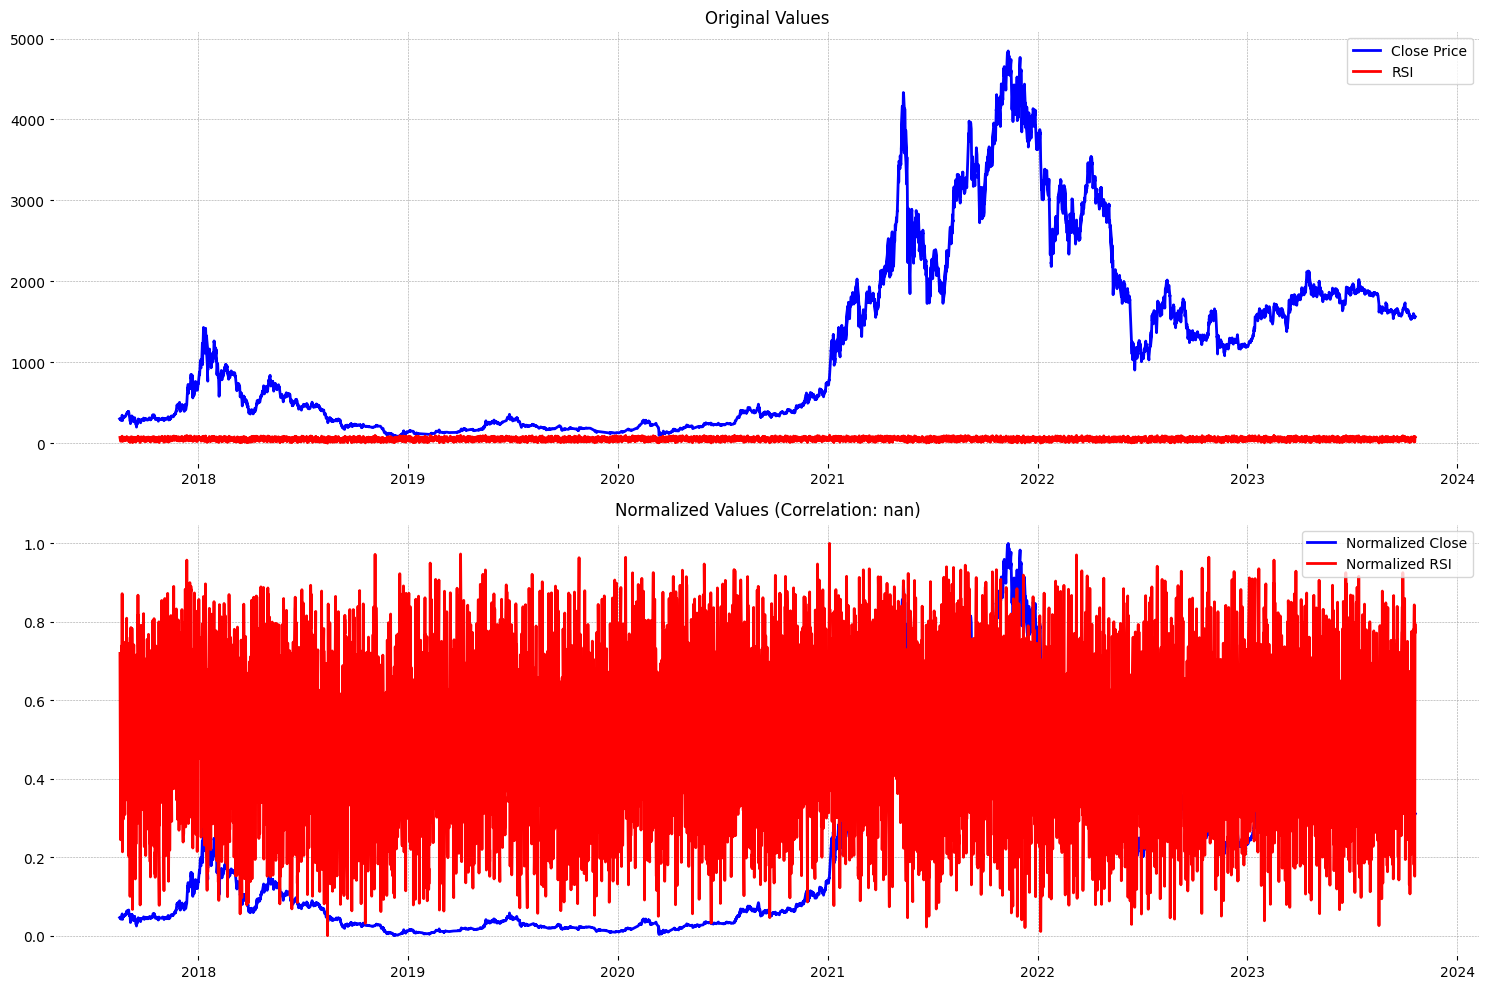

Correlation between normalized Close and RSI: nan

RSI Basic Statistics:
count    53974.000000
mean        50.628522
std         16.591005
min          0.999841
25%         38.851330
50%         50.473721
75%         62.457287
max         99.889928
Name: RSI, dtype: float64

✅ RSI looks reasonably independent of price.


In [22]:
def diagnose_rsi(data):
    """
    Diagnose potential issues with RSI calculation.
    
    Args:
        data (pd.DataFrame): DataFrame with 'Close' and 'RSI' columns
    """
    # Normalize both Close price and RSI for comparison
    close_normalized = (data['Close'] - data['Close'].min()) / (data['Close'].max() - data['Close'].min())
    rsi_normalized = (data['RSI'] - data['RSI'].min()) / (data['RSI'].max() - data['RSI'].min())

    # Calculate correlation
    correlation = np.corrcoef(close_normalized, rsi_normalized)[0, 1]
    
    # Plotting
    plt.figure(figsize=(15, 10))
    
    # Subplot for original values
    plt.subplot(2, 1, 1)
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.plot(data.index, data['RSI'], label='RSI', color='red')
    plt.title('Original Values')
    plt.legend()
    
    # Subplot for normalized values
    plt.subplot(2, 1, 2)
    plt.plot(data.index, close_normalized, label='Normalized Close', color='blue')
    plt.plot(data.index, rsi_normalized, label='Normalized RSI', color='red')
    plt.title(f'Normalized Values (Correlation: {correlation:.4f})')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"Correlation between normalized Close and RSI: {correlation}")
    
    # Basic RSI properties
    print("\nRSI Basic Statistics:")
    print(data['RSI'].describe())
    
    # Check for potential calculation issues
    if correlation > 0.8:
        print("\n⚠️ WARNING: High correlation between price and RSI suggests calculation issue!")
    else:
        print("\n✅ RSI looks reasonably independent of price.")
diagnose_rsi(data)